#### **Deploy de aplicações**

#### **Observações**

#### **Conteúdo - Bases e Notebook da aula**

Github:  
https://github.com/FIAP/Pos_Tech_DTAT/tree/dd201a034223a16732c6f639b40600b26bd3129c

Como criar ambientes para evitar conflito:  
https://github.com/RicardViana/fiap-data-viz-and-production-models/blob/main/Roteiro%20para%20cria%C3%A7%C3%A3o%20de%20ambiente.pdf

Base Credit Card Approval Predictio do Kaggle:  
https://www.kaggle.com/datasets/rikdifos/credit-card-approval-prediction

#### O que é uma Classe em Programação? (A Analogia da Planta da Casa)

Uma **Classe** é um dos conceitos fundamentais da Programação Orientada a Objetos (POO). A melhor maneira de entendê-la é com uma analogia.

Pense em uma **Classe** como a **PLANTA DE UMA CASA** (um *molde*, um *projeto*).

Pense em um **Objeto** como a **CASA REAL** construída a partir dessa planta.

---

##### 1. A Classe (A Planta Blueprint)

A planta da casa é só um *projeto* no papel. Ela não é uma casa, é apenas a **ideia** ou o **molde** da casa.

A planta define como a casa *deve ser*:
* **Atributos (Dados):** O que a casa *terá*.
    * Ex: "Terá 3 quartos."
    * Ex: "Terá 2 banheiros."
    * Ex: "Terá uma cor de parede."
* **Métodos (Funções):** O que a casa *saberá fazer*.
    * Ex: "Terá uma função `acender_luzes()`."
    * Ex: "Terá uma função `abrir_garagem()`."

Você não pode *morar* em uma planta.

##### 2. O Objeto (A Casa Real / A Instância)

O **Objeto** (também chamado de "instância") é a *coisa real* que você constrói *usando* a planta (a Classe) como guia.

* Você pega a planta (Classe) e constrói uma casa. **Essa casa é um Objeto.**
* Seu vizinho usa a *exatamente mesma planta* (Classe) e constrói outra casa. **Essa outra casa é outro Objeto.**

Ambas as casas (objetos) vieram da *mesma planta* (classe), mas são **independentes**. Se você pintar a sua casa de azul, a casa do seu vizinho não muda de cor.

---

##### Trazendo para o Código (Exemplo `DropFeatures`)

Vamos analisar a classe `DropFeatures` usando essa ideia:

###### 1. A Classe (A Planta / O Molde)

Aqui você está desenhando a **PLANTA** de um "Removedor de Colunas". Você está definindo o **MOLDE**.

```python
# A "Planta" de um "Removedor de Colunas"
class DropFeatures (BaseEstimator, TransformerMixin):
    
    # 1. Atributos (O que ele TEM)
    # Define que, ao ser construído, ele DEVE receber as colunas a remover.
    # O método __init__ é o "construtor"
    def __init__(self, feature_to_drop=['ID_Cliente']):
        self.feature_to_drop = feature_to_drop # "Guarde essa informação"
    
    # 2. Métodos (O que ele SABE FAZER)
    # Define que ele DEVE saber "aprender" (método fit)
    def fit(self, df):
        return self
    
    # Define que ele DEVE saber "transformar" (método transform)
    def transform(self, df):
        df.drop(self.feature_to_drop, axis=1, inplace= True)
        return df

#### **Importação de bibliotecas**

In [ ]:
# Importar biblioteca completa
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import numpy as np
import joblib 

#import warnings
#warnings.filterwarnings("ignore")

# Importar algo especifico de uma biblioteca
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.metrics import classification_report, roc_auc_score, ConfusionMatrixDisplay, RocCurveDisplay
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

#### **Class**

In [2]:
"""
O Que é Essa Classe?

Em uma frase: é um transformador personalizado (um custom transformer) criado para ser encaixado em um Pipeline do scikit-learn.

A única função dessa classe é remover colunas específicas de um DataFrame (por padrão, a coluna ID_Cliente) durante o processo de preparação dos dados.
 
Por que criar uma Classe só para isso?

Essa é a pergunta mais importante. Você poderia simplesmente usar meus_dados.drop('ID_Cliente', axis=1) no seu notebook.

O motivo de criar uma classe é para automação, reprodutibilidade e padronização, que são os pilares do MLOps (Operações de Machine Learning).

Quando você usa um Pipeline do scikit-learn, você encadeia várias etapas de preparação (ex: tratar nulos, escalar dados, codificar categorias). 
O Pipeline espera que cada etapa seja um objeto que tenha dois métodos principais: fit() e transform().

Essa sua classe DropFeatures é uma "peça de Lego" personalizada que você criou para se encaixar nesse Pipeline. Ela "finge" ser um transformador oficial do scikit-learn.

Análise do Código

class DropFeatures(BaseEstimator, TransformerMixin):

  * É aqui que a "mágica" acontece. Ao "herdar" (receber as características) de BaseEstimator e TransformerMixin, sua classe automaticamente ganha compatibilidade com o ecossistema do scikit-learn.
  * BaseEstimator: Permite que ela seja usada em ferramentas como GridSearchCV (para otimizar parâmetros).
  * TransformerMixin: Dá a ela de graça o método fit_transform(), que é super útil (ele simplesmente chama o fit e depois o transform em sequência).

def __init__(self, feature_to_drop=['ID_Cliente']):

  * Este é o construtor da classe. É executado quando você cria um objeto.
  * Ele define quais colunas você quer remover. O padrão é ['ID_Cliente'].
  * Isso a torna flexível. Você pode usá-la assim:
      * DropFeatures(): vai remover ID_Cliente.
      * DropFeatures(feature_to_drop=['ID', 'CPF', 'Nome']): vai remover essas três colunas.

def fit(self, df):

  * O método fit é onde um transformador "aprende" algo com os dados. Por exemplo, um StandardScaler "aprende" a média e o desvio padrão dos dados de treino.
  * Para remover uma coluna, não precisamos "aprender" nada. A decisão já foi tomada.
  * Por isso, o método fit aqui não faz nada além de return self. Isso é obrigatório apenas para cumprir o contrato (a "API") do scikit-learn.

def transform(self, df):

  * Este é o método que realiza a ação. É onde os dados são de fato modificados.
  * Ele recebe um DataFrame (df).
  * df.drop(self.feature_to_drop, axis=1, inplace=True): Esta linha executa o comando drop do pandas, removendo as colunas que foram definidas no __init__.
  * return df: Retorna o DataFrame modificado (agora sem as colunas indesejadas) para a próxima etapa do Pipeline.

=

"""

class DropFeatures(BaseEstimator,TransformerMixin):
    def __init__(self, feature_to_drop = ['ID_Cliente']):
        self.feature_to_drop = feature_to_drop

    def fit(self,df):
        return self
    
    def transform(self,df):
        if (set(self.feature_to_drop).issubset(df.columns)):
            df = df.drop(self.feature_to_drop,axis=1)
            return df
        else:
            print('Uma ou mais features não estão no DataFrame')
            return df

In [3]:
class MinMax(BaseEstimator,TransformerMixin):
    def __init__(self, min_max_scaler  = ['Idade', 'Rendimento_anual', 'Tamanho_familia', 'Anos_empregado']):
        self.min_max_scaler = min_max_scaler 

    def fit(self,df):
        return self
    
    def transform(self,df):
        if (set(self.min_max_scaler ).issubset(df.columns)):
            min_max_enc = MinMaxScaler()
            df[self.min_max_scaler] = min_max_enc.fit_transform(df[self.min_max_scaler ])
            return df
        else:
            print('Uma ou mais features não estão no DataFrame')
            return df

In [4]:
class OneHotEncodingNames(BaseEstimator,TransformerMixin):
    def __init__(self, OneHotEncoding = ['Categoria_de_renda', 'Estado_civil', 'Moradia', 'Ocupacao']):                                      
        self.OneHotEncoding = OneHotEncoding

    def fit(self,df):
        return self

    def transform(self,df):
        if (set(self.OneHotEncoding).issubset(df.columns)):
            def one_hot_enc(df,OneHotEncoding):
                try:
                    enc = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
                except TypeError:
                    enc = OneHotEncoder(sparse=False, handle_unknown='ignore')

                enc.fit(df[OneHotEncoding])

                try:
                    feature_names = enc.get_feature_names_out(OneHotEncoding)
                except AttributeError:
                    feature_names = enc.get_feature_names(OneHotEncoding)

                X_enc = enc.transform(df[OneHotEncoding])
                df_enc = pd.DataFrame(X_enc, columns=feature_names, index=df.index)
                return df_enc

            def concat_with_rest(df,one_hot_enc_df,OneHotEncoding):              
                outras_features = [feature for feature in df.columns if feature not in OneHotEncoding]
                df_concat = pd.concat([one_hot_enc_df, df[outras_features]],axis=1)
                return df_concat

            df_OneHotEncoding = one_hot_enc(df,self.OneHotEncoding)
            df_full = concat_with_rest(df, df_OneHotEncoding,self.OneHotEncoding)
            return df_full

        else:
            print('Uma ou mais features não estão no DataFrame')
            return df

In [5]:
class OrdinalFeature(BaseEstimator,TransformerMixin):
    def __init__(self, ordinal_feature = ['Grau_escolaridade']):
        self.ordinal_feature = ordinal_feature

    def fit(self,df):
        return self
    
    def transform(self,df):
        if 'Grau_escolaridade' in df.columns:
            ordinal_encoder = OrdinalEncoder()
            df[self.ordinal_feature] = ordinal_encoder.fit_transform(df[self.ordinal_feature])
            return df
        else:
            print("Grau_escolaridade não está no DataFrame")
            return df

In [6]:
class Oversample(BaseEstimator,TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self,df):
        return self
    
    def transform(self,df):
        if 'Mau' in df.columns:
            oversample = SMOTE(sampling_strategy='minority')
            X_bal, y_bal = oversample.fit_resample(df.loc[:, df.columns != 'Mau'], df['Mau'])
            df_bal = pd.concat([pd.DataFrame(X_bal),pd.DataFrame(y_bal)],axis=1)
            return df_bal
        else:
            print("O target não está no DataFrame")
            return df

#### **Funções (def)**

In [7]:
def verifica(registros):
  lista_status = registros['Faixa_atraso'].to_list()
  if '60-89 dias' in lista_status or '90-119 dias' in lista_status or '120-149 dias' in lista_status or '>150 dias' in lista_status:
    return 1
  else:
    return 0

In [8]:
def pipeline(df):

    pipeline = Pipeline([
        ('feature_dropper', DropFeatures()),
        ('min_max_scaler', MinMax()),
        ('OneHotEncoding', OneHotEncodingNames()),
        ('ordinal_feature', OrdinalFeature()),
        ('oversample', Oversample())
    ])
    df_pipeline = pipeline.fit_transform(df)
    
    return df_pipeline

In [106]:
def roda_modelo(modelo, x_treino, y_treino, x_teste, y_teste):
    
    # Treinando modelo com os dados de treino
    modelo.fit(x_treino, y_treino)

    # ✅ Calcular métricas nos DADOS DE TESTE
    prob_predic_teste = modelo.predict_proba(x_teste)
    
    print(f"\n------------------------------Resultados {modelo}------------------------------\n")
    
    # AUC com dados de TESTE
    auc = roc_auc_score(y_teste, prob_predic_teste[:,1])
    print(f"AUC (Teste): {float(auc)}")
    
    # KS com dados de TESTE
    data_bom = np.sort(modelo.predict_proba(x_teste)[:, 0])
    data_mau = np.sort(modelo.predict_proba(x_teste)[:, 1])
    kstest = stats.ks_2samp(data_bom, data_mau)
    
    print(f"Métrica KS:")
    print(f"  Statistic: {float(kstest.statistic)}")
    print(f"  P-value: {float(kstest.pvalue)}")
    
    print("\nConfusion Matrix (Teste)\n")
    
    # Matriz de confusão
    fig, ax = plt.subplots(figsize=(7,7))
    ConfusionMatrixDisplay.from_estimator(
        modelo, 
        x_teste,   
        y_teste,  
        normalize='true',
        display_labels=['Bom pagador', 'Mau pagador'],
        ax=ax, 
        cmap=plt.cm.Blues
    )
    ax.set_title("Matriz de Confusão (Teste)\n Normalizada", fontsize=16, fontweight="bold")
    ax.set_xlabel("Label predita", fontsize=18)
    ax.set_ylabel("Label verdadeira", fontsize=18)
    plt.grid(False)    
    plt.show()
    
    # Classification report
    predicao_teste = modelo.predict(x_teste)
    print("\nClassification Report (Teste)")
    print(classification_report(y_teste, predicao_teste, zero_division=0))
    
    print("\nROC Curve (Teste)\n")
    RocCurveDisplay.from_estimator(modelo, x_teste, y_teste)
    plt.show()

#### **Aula 1 - Tratando os dados**

In [10]:
# Importar dados cadastrado 

link = 'https://raw.githubusercontent.com/FIAP/Pos_Tech_DTAT/dd201a034223a16732c6f639b40600b26bd3129c/dados/clientes_cadastrados.csv'
cadastrados = pd.read_csv(link, sep= ",")

In [11]:
# Ver os primeiros dados 

cadastrados.head()

,ID_Cliente,Genero,Tem_carro,Tem_casa_propria,Qtd_filhos,Rendimento_anual,Categoria_de_renda,Grau_escolaridade,Estado_civil,Moradia,Idade,Anos_empregado,Tem_celular,Tem_telefone_trabalho,Tem_telefone_fixo,Tem_email,Ocupacao,Tamanho_familia
0,5008804,M,Y,Y,0,427500.0,Empregado,Ensino superior,União-estável,Apartamento alugado,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Empregado,Ensino superior,União-estável,Apartamento alugado,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Empregado,Ensino médio,Casado,Casa/apartamento próprio,-21474,-1134,1,0,0,0,Segurança,2.0
3,5008808,F,N,Y,0,270000.0,Associado comercial,Ensino médio,Solteiro,Casa/apartamento próprio,-19110,-3051,1,0,1,1,Vendas,1.0
4,5008809,F,N,Y,0,270000.0,Associado comercial,Ensino médio,Solteiro,Casa/apartamento próprio,-19110,-3051,1,0,1,1,Vendas,1.0


In [12]:
# Ver os a qtd de linhas e colunas

cadastrados.shape

(438557, 18)

In [13]:
# Ver clientes duplicados

contagem = cadastrados['ID_Cliente'].value_counts()
contagem[contagem > 1]

ID_Cliente
7702516    2
7602432    2
7836971    2
7213374    2
7052783    2
7023651    2
7838075    2
7636389    2
7052812    2
7372589    2
7155150    2
7090931    2
7091721    2
7137299    2
7744386    2
7772847    2
7636756    2
7317997    2
7053557    2
7742853    2
7576316    2
7099881    2
7046068    2
7036518    2
7742298    2
7022197    2
7603224    2
7023108    2
7089090    2
7702238    2
7243768    2
7045885    2
7836711    2
7743418    2
7045794    2
7618285    2
7207977    2
7154598    2
7154819    2
7024111    2
7282535    2
7050948    2
7416167    2
7174719    2
7833087    2
7135270    2
7022327    2
Name: count, dtype: int64

In [14]:
# Ver qtd de registros duplicados

cadastrados[cadastrados['ID_Cliente'].duplicated(keep=False)].shape


(94, 18)

In [15]:
# Filtrar apenas clientes com ID duplicado

ids_duplicados = cadastrados['ID_Cliente'].duplicated(keep=False).copy()
cadastrados[ids_duplicados].sort_values('ID_Cliente')

,ID_Cliente,Genero,Tem_carro,Tem_casa_propria,Qtd_filhos,Rendimento_anual,Categoria_de_renda,Grau_escolaridade,Estado_civil,Moradia,Idade,Anos_empregado,Tem_celular,Tem_telefone_trabalho,Tem_telefone_fixo,Tem_email,Ocupacao,Tamanho_familia
425023,7022197,F,N,Y,0,450000.0,Associado comercial,Ensino superior,Divorciado,Casa/apartamento próprio,-19813,-1799,1,0,0,1,NaN,1.0
426818,7022197,M,Y,Y,3,135000.0,Empregado,Ensino médio,Casado,Casa/apartamento próprio,-11945,-735,1,0,0,1,Construção Civil,5.0
431911,7022327,M,Y,Y,0,256500.0,Associado comercial,Ensino superior,Casado,Casa/apartamento próprio,-21503,-1674,1,0,0,1,Equipe principal,2.0
431545,7022327,F,N,Y,0,135000.0,Associado comercial,Ensino médio,Solteiro,Casa/apartamento próprio,-14771,-5298,1,0,0,0,Alta tecnologia,1.0
425486,7023108,M,Y,Y,1,67500.0,Empregado,Ensino médio,Casado,Casa/apartamento próprio,-15156,-1696,1,1,0,0,Equipe principal,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426563,7836711,F,N,Y,2,292500.0,Empregado,Ensino superior,Casado,Casa/apartamento próprio,-13747,-4386,1,0,1,0,Contabilidade,4.0
428620,7836971,F,N,Y,0,103500.0,Empregado,Ensino médio,União-estável,Casa/apartamento próprio,-13383,-2798,1,0,1,0,Vendas,2.0
421464,7836971,M,Y,N,1,157500.0,Empregado,Ensino médio,Casado,Casa/apartamento próprio,-13771,-5520,1,0,0,0,NaN,3.0
422068,7838075,M,N,Y,0,337500.0,Associado comercial,Ensino médio,Casado,Casa/apartamento próprio,-18198,-1275,1,0,0,1,Motorista,2.0


In [16]:
# Remover os dados duplicados

id_repetidos = cadastrados[cadastrados['ID_Cliente'].duplicated(keep=False)]
df_cadastrados_limpo = cadastrados.drop(id_repetidos.index)

In [17]:
# Ver clientes duplicados novamente pós drop

contagem = df_cadastrados_limpo['ID_Cliente'].value_counts()
contagem[contagem > 1]

Series([], Name: count, dtype: int64)

In [18]:
# Filtrar apenas colunas com valores nulos

df_cadastrados_limpo.isnull().sum()[df_cadastrados_limpo.isnull().sum() > 0]

Ocupacao    134177
dtype: int64

In [19]:
# Ver os tipos de Ocupacao

df_cadastrados_limpo['Ocupacao'].unique()

array([nan, 'Segurança', 'Vendas', 'Contabilidade', 'Construção Civil',
       'Gerência', 'Motorista', 'Equipe principal', 'Alta tecnologia',
       'Limpeza', 'Serviço privado', 'Cozinha', 'Baixa qualificação',
       'Medicina', 'Secretariado', 'Garçom', 'RH', 'Corretor imobiliário',
       'TI'], dtype=object)

In [20]:
# Tratar os dados null 

df_cadastrados_limpo['Ocupacao'] = df_cadastrados_limpo['Ocupacao'].fillna(value='Outros')

In [21]:
# Filtrar apenas colunas com valores nulos

df_cadastrados_limpo.isnull().sum()

ID_Cliente               0
Genero                   0
Tem_carro                0
Tem_casa_propria         0
Qtd_filhos               0
Rendimento_anual         0
Categoria_de_renda       0
Grau_escolaridade        0
Estado_civil             0
Moradia                  0
Idade                    0
Anos_empregado           0
Tem_celular              0
Tem_telefone_trabalho    0
Tem_telefone_fixo        0
Tem_email                0
Ocupacao                 0
Tamanho_familia          0
dtype: int64

In [22]:
# Ver a qtd de registro unica de cada coluna
df_cadastrados_limpo.nunique()

ID_Cliente               438463
Genero                        2
Tem_carro                     2
Tem_casa_propria              2
Qtd_filhos                   12
Rendimento_anual            866
Categoria_de_renda            5
Grau_escolaridade             5
Estado_civil                  5
Moradia                       6
Idade                     16379
Anos_empregado             9406
Tem_celular                   1
Tem_telefone_trabalho         2
Tem_telefone_fixo             2
Tem_email                     2
Ocupacao                     19
Tamanho_familia              13
dtype: int64

In [23]:
# Remover colunas não necessarias

df_cadastrados_limpo = df_cadastrados_limpo.drop('Genero', axis=1)
df_cadastrados_limpo = df_cadastrados_limpo.drop('Tem_celular', axis=1)

In [24]:
# Ver os dados unico --> Tem_carro

df_cadastrados_limpo['Tem_carro'].unique()

array(['Y', 'N'], dtype=object)

In [25]:
# Ver os dados unico --> Tem_casa_propria

df_cadastrados_limpo['Tem_casa_propria'].unique()

array(['Y', 'N'], dtype=object)

In [26]:
# Ver os dados unico --> Tem_telefone_trabalho

df_cadastrados_limpo['Tem_telefone_trabalho'].unique()

array([1, 0])

In [27]:
# Ver os dados unico --> Tem_telefone_fixo

df_cadastrados_limpo['Tem_telefone_fixo'].unique()

array([0, 1])

In [28]:
# Ver os dados unico --> Tem_email

df_cadastrados_limpo['Tem_email'].unique()

array([0, 1])

In [29]:
# Ver os tipos de dados

df_cadastrados_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 438463 entries, 0 to 438556
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID_Cliente             438463 non-null  int64  
 1   Tem_carro              438463 non-null  object 
 2   Tem_casa_propria       438463 non-null  object 
 3   Qtd_filhos             438463 non-null  int64  
 4   Rendimento_anual       438463 non-null  float64
 5   Categoria_de_renda     438463 non-null  object 
 6   Grau_escolaridade      438463 non-null  object 
 7   Estado_civil           438463 non-null  object 
 8   Moradia                438463 non-null  object 
 9   Idade                  438463 non-null  int64  
 10  Anos_empregado         438463 non-null  int64  
 11  Tem_telefone_trabalho  438463 non-null  int64  
 12  Tem_telefone_fixo      438463 non-null  int64  
 13  Tem_email              438463 non-null  int64  
 14  Ocupacao               438463 non-null  o

In [30]:
# Alterar os dados 

df_cadastrados_limpo['Tem_carro'] = df_cadastrados_limpo['Tem_carro'].map({'Y': 1, 'N': 0})
df_cadastrados_limpo['Tem_casa_propria'] = df_cadastrados_limpo['Tem_casa_propria'].map({'Y': 1, 'N': 0})

In [31]:
# Ver os dados tratados

df_cadastrados_limpo.head()

,ID_Cliente,Tem_carro,Tem_casa_propria,Qtd_filhos,Rendimento_anual,Categoria_de_renda,Grau_escolaridade,Estado_civil,Moradia,Idade,Anos_empregado,Tem_telefone_trabalho,Tem_telefone_fixo,Tem_email,Ocupacao,Tamanho_familia
0,5008804,1,1,0,427500.0,Empregado,Ensino superior,União-estável,Apartamento alugado,-12005,-4542,1,0,0,Outros,2.0
1,5008805,1,1,0,427500.0,Empregado,Ensino superior,União-estável,Apartamento alugado,-12005,-4542,1,0,0,Outros,2.0
2,5008806,1,1,0,112500.0,Empregado,Ensino médio,Casado,Casa/apartamento próprio,-21474,-1134,0,0,0,Segurança,2.0
3,5008808,0,1,0,270000.0,Associado comercial,Ensino médio,Solteiro,Casa/apartamento próprio,-19110,-3051,0,1,1,Vendas,1.0
4,5008809,0,1,0,270000.0,Associado comercial,Ensino médio,Solteiro,Casa/apartamento próprio,-19110,-3051,0,1,1,Vendas,1.0


In [32]:
# Tratar os dados Idade e Anos_empregado

df_cadastrados_limpo['Idade'] = - df_cadastrados_limpo['Idade']/365.2425
df_cadastrados_limpo['Anos_empregado'] = - df_cadastrados_limpo['Anos_empregado']/365.2425

In [33]:
# Ver os dados pós tratamento 

df_cadastrados_limpo.head()

,ID_Cliente,Tem_carro,Tem_casa_propria,Qtd_filhos,Rendimento_anual,Categoria_de_renda,Grau_escolaridade,Estado_civil,Moradia,Idade,Anos_empregado,Tem_telefone_trabalho,Tem_telefone_fixo,Tem_email,Ocupacao,Tamanho_familia
0,5008804,1,1,0,427500.0,Empregado,Ensino superior,União-estável,Apartamento alugado,32.868574,12.435574,1,0,0,Outros,2.0
1,5008805,1,1,0,427500.0,Empregado,Ensino superior,União-estável,Apartamento alugado,32.868574,12.435574,1,0,0,Outros,2.0
2,5008806,1,1,0,112500.0,Empregado,Ensino médio,Casado,Casa/apartamento próprio,58.793815,3.104787,0,0,0,Segurança,2.0
3,5008808,0,1,0,270000.0,Associado comercial,Ensino médio,Solteiro,Casa/apartamento próprio,52.321403,8.353354,0,1,1,Vendas,1.0
4,5008809,0,1,0,270000.0,Associado comercial,Ensino médio,Solteiro,Casa/apartamento próprio,52.321403,8.353354,0,1,1,Vendas,1.0


In [34]:
# Ver qtd Anos_empregado

df_cadastrados_limpo['Anos_empregado'].value_counts()

Anos_empregado
-1000.001369    75314
 0.596864         262
 4.594208         251
 0.681739         241
 2.677673         240
                ...  
 19.488422          1
 18.133158          1
 28.671362          1
 21.837546          1
 37.402548          1
Name: count, Length: 9406, dtype: int64

In [35]:
# Tratar os dados 

df_cadastrados_limpo.loc[df_cadastrados_limpo['Anos_empregado'] < 0, 'Anos_empregado'] = 0

In [36]:
# Ver qtd Anos_empregado

df_cadastrados_limpo['Anos_empregado'].value_counts()

Anos_empregado
0.000000     75314
0.596864       262
4.594208       251
0.681739       241
2.677673       240
             ...  
19.488422        1
18.133158        1
28.671362        1
21.837546        1
37.402548        1
Name: count, Length: 9406, dtype: int64

<Axes: >

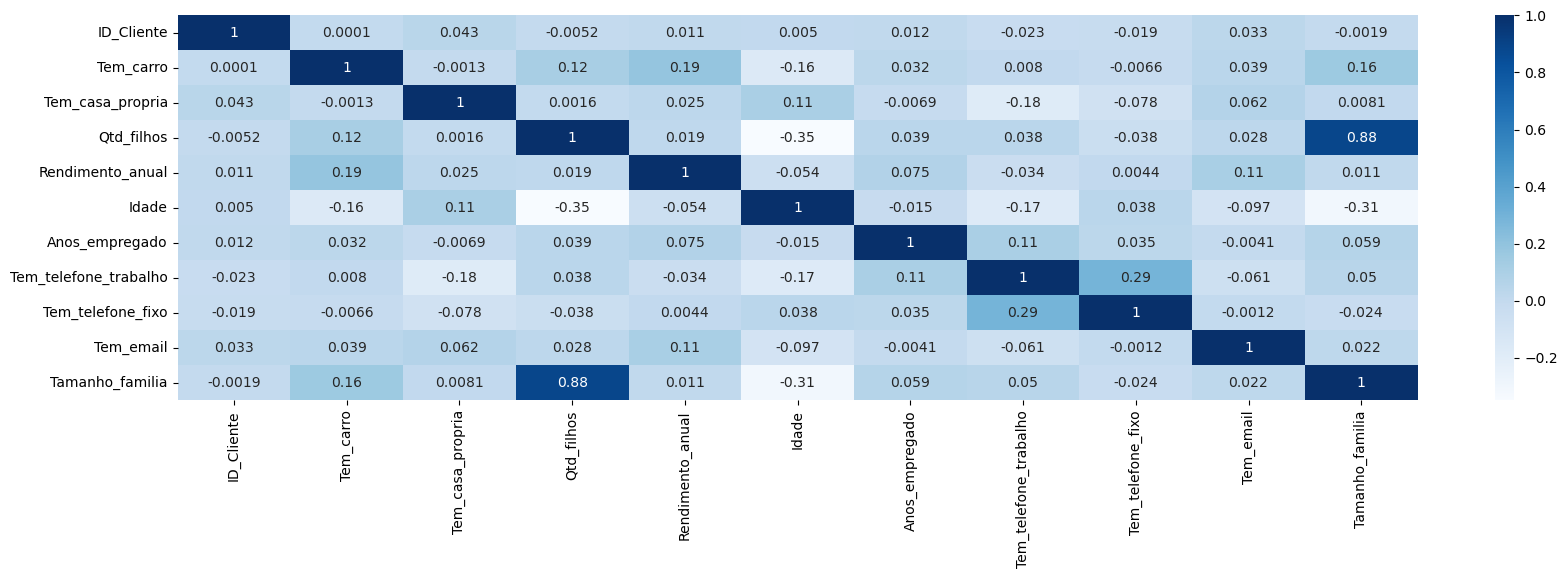

In [37]:
# Gerar grafico de corelação 

corr = df_cadastrados_limpo.select_dtypes(include=["number", "bool"]).corr()
plt.figure(figsize=(20, 5))
sns.heatmap(corr, cmap="Blues", annot=True)


In [38]:
# Remover coluna com alta corelação 

df_cadastrados_limpo = df_cadastrados_limpo.drop(['Qtd_filhos'], axis = 1)

In [39]:
# Atualizar sequencia dos dados

df_cadastrados_limpo=df_cadastrados_limpo[['ID_Cliente', 'Tem_carro', 'Tem_casa_propria', 
                                           'Tem_telefone_trabalho', 'Tem_telefone_fixo', 'Tem_email',
                                           'Tamanho_familia', 'Rendimento_anual', 'Idade', 'Anos_empregado',
                                           'Categoria_de_renda', 'Grau_escolaridade', 'Estado_civil',
                                           'Moradia', 'Ocupacao']]

df_cadastrados_limpo.head()

,ID_Cliente,Tem_carro,Tem_casa_propria,Tem_telefone_trabalho,Tem_telefone_fixo,Tem_email,Tamanho_familia,Rendimento_anual,Idade,Anos_empregado,Categoria_de_renda,Grau_escolaridade,Estado_civil,Moradia,Ocupacao
0,5008804,1,1,1,0,0,2.0,427500.0,32.868574,12.435574,Empregado,Ensino superior,União-estável,Apartamento alugado,Outros
1,5008805,1,1,1,0,0,2.0,427500.0,32.868574,12.435574,Empregado,Ensino superior,União-estável,Apartamento alugado,Outros
2,5008806,1,1,0,0,0,2.0,112500.0,58.793815,3.104787,Empregado,Ensino médio,Casado,Casa/apartamento próprio,Segurança
3,5008808,0,1,0,1,1,1.0,270000.0,52.321403,8.353354,Associado comercial,Ensino médio,Solteiro,Casa/apartamento próprio,Vendas
4,5008809,0,1,0,1,1,1.0,270000.0,52.321403,8.353354,Associado comercial,Ensino médio,Solteiro,Casa/apartamento próprio,Vendas


In [40]:
# Criar variavel com as colunas quantitativas

colunas_quantitativas = ['Tamanho_familia', 'Rendimento_anual', 'Idade', 'Anos_empregado']

In [41]:
# Ver o describe das colunas 

df_cadastrados_limpo[colunas_quantitativas].describe()

,Tamanho_familia,Rendimento_anual,Idade,Anos_empregado
count,438463.000000,4.384630e+05,438463.000000,438463.000000
mean,2.194461,1.875220e+05,43.800857,5.948371
std,0.897194,1.100832e+05,11.458262,6.564112
min,1.000000,2.610000e+04,20.504186,0.000000
25%,2.000000,1.215000e+05,34.262168,1.015763
50%,2.000000,1.611000e+05,42.793487,4.019247
75%,3.000000,2.250000e+05,53.345380,8.495725
max,20.000000,6.750000e+06,68.997994,47.998248


In [42]:
# Calcular percentual do Categoria_de_renda

df_cadastrados_limpo['Categoria_de_renda'].value_counts(normalize = True) * 100

Categoria_de_renda
Empregado              51.557144
Associado comercial    22.972520
Pensionista            17.214223
Servidor público        8.252236
Estudante               0.003877
Name: proportion, dtype: float64

In [43]:
# Calcular percentual do Grau_escolaridade

df_cadastrados_limpo['Grau_escolaridade'].value_counts(normalize = True) * 100

Grau_escolaridade
Ensino médio                  68.821314
Ensino superior               26.797928
Ensino superior incompleto     3.385690
Ensino fundamental             0.923909
Pós-graduação                  0.071158
Name: proportion, dtype: float64

In [44]:
# Calcular percentual do Estado_civil

df_cadastrados_limpo['Estado_civil'].value_counts(normalize = True) * 100

Estado_civil
Casado           68.367912
Solteiro         12.601976
União-estável     8.329323
Divorciado        6.214663
Viúvo             4.486125
Name: proportion, dtype: float64

In [45]:
# Calcular percentual do Moradia

df_cadastrados_limpo['Moradia'].value_counts(normalize = True) * 100

Moradia
Casa/apartamento próprio    89.801876
Mora com os pais             4.349740
Habitação pública            3.241094
Apartamento alugado          1.362259
Apartamento comercial        0.894032
Cooperativa habitacional     0.350999
Name: proportion, dtype: float64

In [46]:
# Calcular percentual do Ocupacao

df_cadastrados_limpo['Ocupacao'].value_counts(normalize = True) * 100

Ocupacao
Outros                  30.601670
Construção Civil        17.840730
Equipe principal         9.805388
Vendas                   9.371828
Gerência                 8.091219
Motorista                5.949191
Alta tecnologia          3.941724
Contabilidade            3.644549
Medicina                 3.083042
Cozinha                  1.841432
Segurança                1.822959
Limpeza                  1.332610
Serviço privado          0.787980
Baixa qualificação       0.488069
Secretariado             0.466174
Garçom                   0.379736
Corretor imobiliário     0.237420
RH                       0.176526
TI                       0.137754
Name: proportion, dtype: float64

#### **Aula 2 - Criando a variável target**

In [47]:
# Importar dados cadastrado 

link = 'https://raw.githubusercontent.com/FIAP/Pos_Tech_DTAT/dd201a034223a16732c6f639b40600b26bd3129c/dados/clientes_aprovados.csv'
aprovados = pd.read_csv(link, sep= ",")

In [48]:
# Ver os tipos de dados

aprovados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID_Cliente      1048575 non-null  int64 
 1   Mes_referencia  1048575 non-null  int64 
 2   Faixa_atraso    1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [49]:
# Ver os dados 

aprovados.head()

,ID_Cliente,Mes_referencia,Faixa_atraso
0,5001711,0,nenhum empréstimo
1,5001711,-1,1-29 dias
2,5001711,-2,1-29 dias
3,5001711,-3,1-29 dias
4,5001712,0,pagamento realizado


In [50]:
# Fazer o filtro usando .query 

aprovados.query('ID_Cliente == 5001717')

,ID_Cliente,Mes_referencia,Faixa_atraso
120,5001717,0,pagamento realizado
121,5001717,-1,pagamento realizado
122,5001717,-2,pagamento realizado
123,5001717,-3,pagamento realizado
124,5001717,-4,pagamento realizado
125,5001717,-5,1-29 dias
126,5001717,-6,1-29 dias
127,5001717,-7,1-29 dias
128,5001717,-8,1-29 dias
129,5001717,-9,1-29 dias


In [51]:
# Fazer o filtro usando .query 

aprovados.query('ID_Cliente == 5001711')

,ID_Cliente,Mes_referencia,Faixa_atraso
0,5001711,0,nenhum empréstimo
1,5001711,-1,1-29 dias
2,5001711,-2,1-29 dias
3,5001711,-3,1-29 dias


In [52]:
# Fazer a contagem com base na coluna Faixa_atraso

aprovados.Faixa_atraso.value_counts()

Faixa_atraso
pagamento realizado    442031
1-29 dias              383120
nenhum empréstimo      209230
30-59 dias              11090
>150 dias                1693
60-89 dias                868
90-119 dias               320
120-149 dias              223
Name: count, dtype: int64

In [53]:
# Agrupar os dados 
# Criar um objeto GroupBy ou pandas.core.groupby.generic.DataFrameGroupBy --> Exemplo 5001711: [0, 1, 2, 3]

df_registros_credito_agrupados_ID = aprovados.groupby('ID_Cliente')

In [54]:
# Verificar o tipo do objeto

type(df_registros_credito_agrupados_ID)

pandas.core.groupby.generic.DataFrameGroupBy

In [55]:
# Ver os grupos criados

df_registros_credito_agrupados_ID.groups

{5001711: [0, 1, 2, 3], 5001712: [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22], 5001713: [23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44], 5001714: [45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59], 5001715: [60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119], 5001717: [120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141], 5001718: [142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180], 5001719: [181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 20

In [56]:
# Criar um pandas.core.series.Series com o min abertura 

ser_abertura = df_registros_credito_agrupados_ID['Mes_referencia'].apply(lambda x: min(x))
ser_abertura.name = 'Abertura'

ser_abertura.head()

ID_Cliente
5001711    -3
5001712   -18
5001713   -21
5001714   -14
5001715   -59
Name: Abertura, dtype: int64

In [57]:
# Realizar o merge entre os data frame 

df_clientes_aprovados = aprovados.merge(ser_abertura, on='ID_Cliente')
df_clientes_aprovados.head()

,ID_Cliente,Mes_referencia,Faixa_atraso,Abertura
0,5001711,0,nenhum empréstimo,-3
1,5001711,-1,1-29 dias,-3
2,5001711,-2,1-29 dias,-3
3,5001711,-3,1-29 dias,-3
4,5001712,0,pagamento realizado,-18


In [58]:
# # Criar um pandas.core.series.Series com o min abertura 

ser_final = df_registros_credito_agrupados_ID['Mes_referencia'].apply(lambda x: max(x))
ser_final.name = 'Final'

ser_final.head()

ID_Cliente
5001711    0
5001712    0
5001713    0
5001714    0
5001715    0
Name: Final, dtype: int64

In [59]:
# Realizar o merge entre os data frame 

df_clientes_aprovados = df_clientes_aprovados.merge(ser_final, on='ID_Cliente')
df_clientes_aprovados.head()

,ID_Cliente,Mes_referencia,Faixa_atraso,Abertura,Final
0,5001711,0,nenhum empréstimo,-3,0
1,5001711,-1,1-29 dias,-3,0
2,5001711,-2,1-29 dias,-3,0
3,5001711,-3,1-29 dias,-3,0
4,5001712,0,pagamento realizado,-18,0


In [60]:
# Criar coluna Janela 

df_clientes_aprovados['Janela'] = df_clientes_aprovados['Final'] - df_clientes_aprovados['Abertura']
df_clientes_aprovados.head()

,ID_Cliente,Mes_referencia,Faixa_atraso,Abertura,Final,Janela
0,5001711,0,nenhum empréstimo,-3,0,3
1,5001711,-1,1-29 dias,-3,0,3
2,5001711,-2,1-29 dias,-3,0,3
3,5001711,-3,1-29 dias,-3,0,3
4,5001712,0,pagamento realizado,-18,0,18


In [61]:
# Criara a coluna MOB (Month on Book)

"""

O que é MOB (Month on Book)?

MOB significa "Month on Book" (Mês no Livro, em tradução literal) e é uma métrica fundamental em serviços financeiros (como cartões de crédito, empréstimos, seguros) e 
em qualquer negócio baseado em subscrição.

Em termos simples, o MOB representa a "idade" da conta de um cliente, medida em meses, desde que ela foi aberta.

  * MOB 0: É o próprio mês em que a conta foi aberta (mês de "aquisição").
  * MOB 1: É o primeiro mês completo *após* a abertura da conta.
  * MOB 12: O cliente está completando um ano.

Por que o MOB é tão importante?

O MOB é a base para a Análise de Safras (Cohort Analysis).

Em vez de olhar para todos os seus clientes de uma só vez (o que mistura clientes novos e antigos), você os agrupa por "safra" (o mês em que entraram). 
O MOB permite que você compare o comportamento de diferentes safras ao longo do tempo.

Com o MOB, você pode responder perguntas como:

  * Risco e Inadimplência: Os clientes que abriram conta em Janeiro/2025 (Safra Jan/25) estão se tornando inadimplentes mais rápido (ex: no MOB 6) do que os clientes da safra de Jan/2024?
  * Rentabilidade: Em qual MOB, em média, um cliente começa a dar lucro?
  * Engajamento: Clientes mais novos (MOB 3) usam mais o app do que clientes mais antigos (MOB 24)?
  * Churn (Cancelamento): Existe um MOB específico em que a maioria dos clientes cancela o serviço?

"""

df_clientes_aprovados['MOB'] = df_clientes_aprovados['Mes_referencia'] - df_clientes_aprovados['Abertura']
df_clientes_aprovados.head()


,ID_Cliente,Mes_referencia,Faixa_atraso,Abertura,Final,Janela,MOB
0,5001711,0,nenhum empréstimo,-3,0,3,3
1,5001711,-1,1-29 dias,-3,0,3,2
2,5001711,-2,1-29 dias,-3,0,3,1
3,5001711,-3,1-29 dias,-3,0,3,0
4,5001712,0,pagamento realizado,-18,0,18,18


In [62]:
# Ver os dados unicos da Faixa_atraso

df_clientes_aprovados['Faixa_atraso'].unique()

array(['nenhum empréstimo', '1-29 dias', 'pagamento realizado',
       '30-59 dias', '60-89 dias', '90-119 dias', '120-149 dias',
       '>150 dias'], dtype=object)

In [63]:
# Criar dicionario para Faixa_atraso

dict_faixa_atraso_ind = {'nenhum empréstimo': 0, 'pagamento realizado': 1, '1-29 dias' : 2, 
       '30-59 dias': 3, '60-89 dias': 4, '90-119 dias': 5, '120-149 dias': 6,
       '>150 dias': 7}

In [64]:
# Criar coluna com Ind_faixa_atraso

df_clientes_aprovados['Ind_faixa_atraso'] = df_clientes_aprovados['Faixa_atraso'].map(dict_faixa_atraso_ind)
df_clientes_aprovados.head()

,ID_Cliente,Mes_referencia,Faixa_atraso,Abertura,Final,Janela,MOB,Ind_faixa_atraso
0,5001711,0,nenhum empréstimo,-3,0,3,3,0
1,5001711,-1,1-29 dias,-3,0,3,2,2
2,5001711,-2,1-29 dias,-3,0,3,1,2
3,5001711,-3,1-29 dias,-3,0,3,0,2
4,5001712,0,pagamento realizado,-18,0,18,18,1


In [65]:
# Criar uma coluna de mau pagamento --> Target

df_clientes_aprovados['Mau'] = df_clientes_aprovados.apply(lambda x:1 if x['Ind_faixa_atraso']>3 else 0, axis=1)

In [66]:
# Ver nova coluna

df_clientes_aprovados.head()

,ID_Cliente,Mes_referencia,Faixa_atraso,Abertura,Final,Janela,MOB,Ind_faixa_atraso,Mau
0,5001711,0,nenhum empréstimo,-3,0,3,3,0,0
1,5001711,-1,1-29 dias,-3,0,3,2,2,0
2,5001711,-2,1-29 dias,-3,0,3,1,2,0
3,5001711,-3,1-29 dias,-3,0,3,0,2,0
4,5001712,0,pagamento realizado,-18,0,18,18,1,0


In [67]:
# Agrupar os dados mantendo o primeiro registro

usar_versao_aula = 'n'

if usar_versao_aula.lower == 's':

    # Solução aula sem o DeprecationWarning

    df_registros_creditos_ID = (
        df_clientes_aprovados[['ID_Cliente', 'Abertura', 'Final', 'Janela']]
        .groupby('ID_Cliente')
        .apply(lambda x: x.iloc[0], include_groups=False)
        .reset_index(drop=True)
    )

else:
    
    # Solução do Copilot para pegar a primeira linha 

    df_registros_creditos_ID = (
        df_clientes_aprovados[['ID_Cliente', 'Abertura', 'Final', 'Janela']]
        .groupby('ID_Cliente', as_index=False)
        .first()
    )



In [68]:
# Ver os dados após o agrupamento

df_registros_creditos_ID.head()

,ID_Cliente,Abertura,Final,Janela
0,5001711,-3,0,3
1,5001712,-18,0,18
2,5001713,-21,0,21
3,5001714,-14,0,14
4,5001715,-59,0,59


In [69]:
# Ver qtd de clientes por abertura --> size considerando os NaN

df_denominador = (
    df_registros_creditos_ID
    .groupby('Abertura', as_index=False)
    .size()
    .rename(columns={'size': 'Qtd_Clientes'})
)

df_denominador.head()

,Abertura,Qtd_Clientes
0,-60,415
1,-59,406
2,-58,440
3,-57,400
4,-56,470


In [70]:
# Ver qtd de clientes por abertura e MOB --> size considerando os NaN

df_vintage = (
    df_clientes_aprovados
    .groupby(['Abertura', 'MOB'], as_index=False)
    .size()
    .rename(columns={'size': 'Qtd_Clientes'})
)
df_vintage.head()


,Abertura,MOB,Qtd_Clientes
0,-60,0,415
1,-60,1,414
2,-60,2,410
3,-60,3,408
4,-60,4,403


In [71]:
# Fazer o merge entre o df_vintage e o df_denominador

df_vintage = pd.merge(df_vintage[['Abertura','MOB']], df_denominador, on='Abertura', how='left')

df_vintage.head()

,Abertura,MOB,Qtd_Clientes
0,-60,0,415
1,-60,1,415
2,-60,2,415
3,-60,3,415
4,-60,4,415


In [72]:
# Calcular qtd de clientes mau pagador

df_vintage['Qtd_Mau'] = np.nan # Preencher coluna com nan

for j in range(-60,1):

    # Lista vazia para armazenar os IDs
    ls = []

    for i in range(0,61):

        # Encontrar todos os clientes que tem Mau = 1 
        due = list(df_clientes_aprovados.query('Mau == 1 and MOB == @i and Abertura == @j')['ID_Cliente'])

        # IDs dos clientes encontrados são armazendos na lista ls
        ls.extend(due)

        # Atribuir os dados na coluna Qtd_Mau
        df_vintage.loc[(df_vintage['MOB'] == i) & (df_vintage['Abertura'] == j), 'Qtd_Mau'] = len (set(ls))

# Calcular taxa de mau pagador
df_vintage['Taxa_de_Mau'] = df_vintage['Qtd_Mau'] / df_vintage['Qtd_Clientes']

df_vintage.head()

,Abertura,MOB,Qtd_Clientes,Qtd_Mau,Taxa_de_Mau
0,-60,0,415,0.0,0.0
1,-60,1,415,0.0,0.0
2,-60,2,415,0.0,0.0
3,-60,3,415,0.0,0.0
4,-60,4,415,0.0,0.0


In [73]:
# Fazer o pivot 

df_vintage_pivot = df_vintage.pivot(index= 'Abertura', columns= 'MOB', values='Taxa_de_Mau')
df_vintage_pivot.head()

MOB,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
Abertura,,,,,,,,,,,,,,,,,,,,,
-60,0.0,0.0,0.000000,0.000000,0.000000,0.002410,0.002410,0.007229,0.007229,0.009639,...,0.028916,0.028916,0.028916,0.028916,0.028916,0.028916,0.028916,0.031325,0.031325,0.031325
-59,0.0,0.0,0.000000,0.004926,0.004926,0.004926,0.007389,0.007389,0.007389,0.012315,...,0.029557,0.029557,0.029557,0.032020,0.032020,0.032020,0.032020,0.032020,0.032020,NaN
-58,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.004545,0.006818,0.006818,...,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,NaN,NaN
-57,0.0,0.0,0.000000,0.000000,0.002500,0.002500,0.002500,0.007500,0.007500,0.007500,...,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,NaN,NaN,NaN
-56,0.0,0.0,0.004255,0.004255,0.008511,0.010638,0.010638,0.017021,0.017021,0.021277,...,0.036170,0.036170,0.036170,0.036170,0.038298,0.038298,NaN,NaN,NaN,NaN


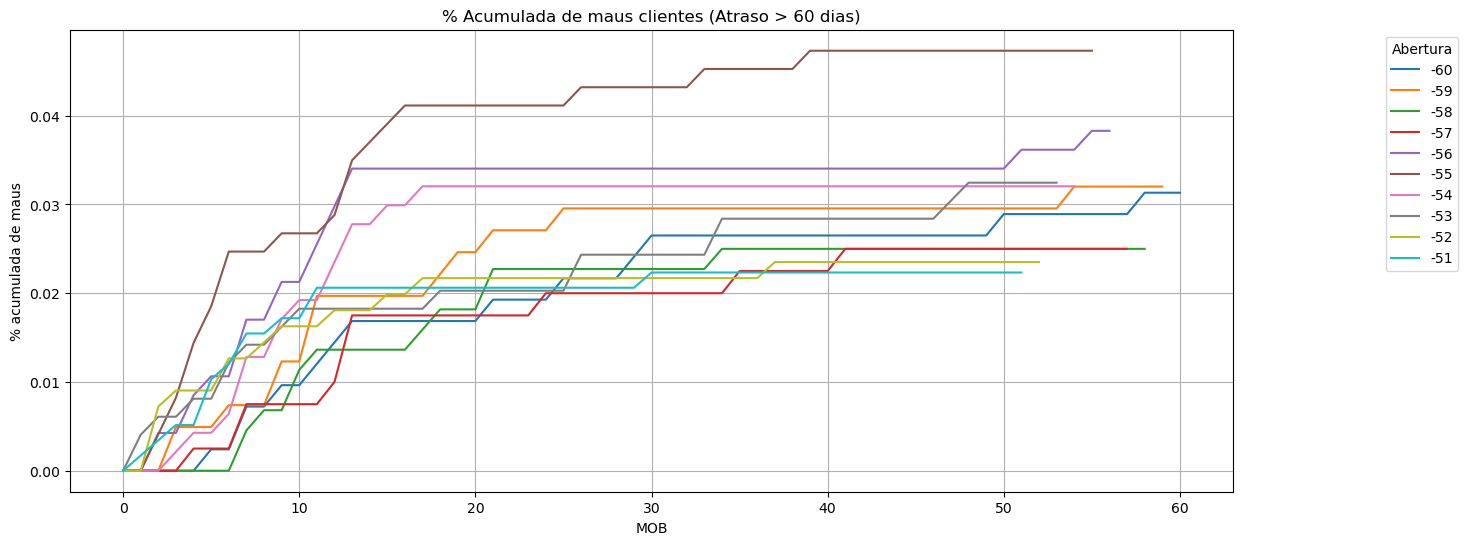

In [74]:
# Plotar o grafico

lst = [i for i in range(0,61)] # list compression

df_vintage_pivot[lst].T.iloc[:, :10].plot(legend=True, grid=True, title='% Acumulada de maus clientes (Atraso > 60 dias)', figsize=(15,6))
plt.xlabel('MOB')
plt.ylabel('% acumulada de maus')
plt.legend(bbox_to_anchor=(1.2,1), title='Abertura')
plt.show()


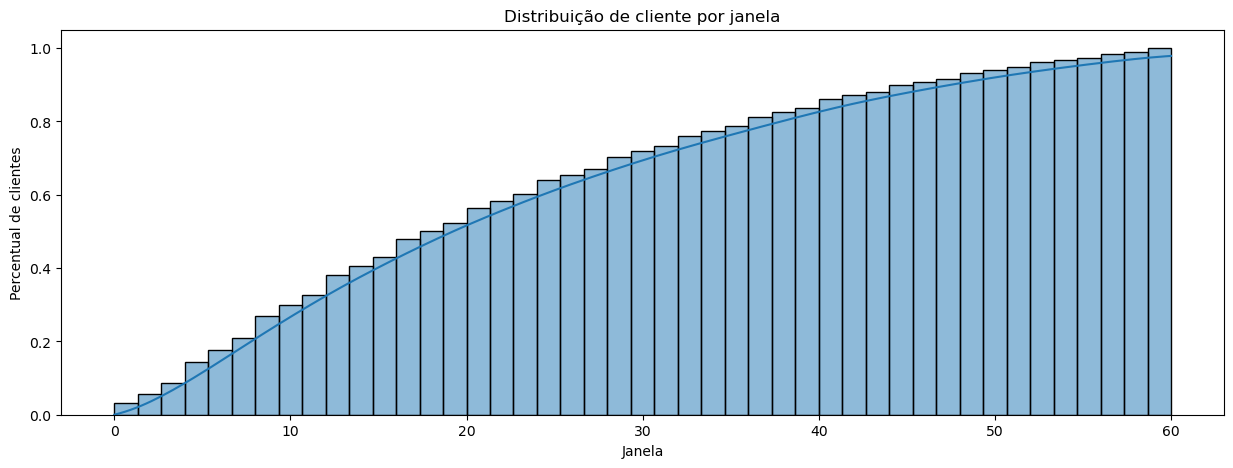

In [75]:
# Plotar um histograma

plt.figure(figsize=(15, 5))

sns.histplot(data = df_registros_creditos_ID, x='Janela', cumulative=True, stat='density', kde=True)
plt.title('Distribuição de cliente por janela')
plt.xlabel('Janela')
plt.ylabel('Percentual de clientes')
plt.show()

In [76]:
# Criar dicionario com faixa de atraso 

dict_intervalo_atraso = {
    'maior_30_dias': 3,
    'maior_60_dias': 4,
    'maior_90_dias': 5,
    'maior_120_dias': 6,
    'maior_150_dias': 7
}

In [77]:
# Criar novas colunas 

for chave, valor in dict_intervalo_atraso.items():
    df_clientes_aprovados[f'Mau_{chave}'] = df_clientes_aprovados.apply(lambda x:1 if x['Ind_faixa_atraso'] >= valor else 0, axis = 1)

df_clientes_aprovados.head()

,ID_Cliente,Mes_referencia,Faixa_atraso,Abertura,Final,Janela,MOB,Ind_faixa_atraso,Mau,Mau_maior_30_dias,Mau_maior_60_dias,Mau_maior_90_dias,Mau_maior_120_dias,Mau_maior_150_dias
0,5001711,0,nenhum empréstimo,-3,0,3,3,0,0,0,0,0,0,0
1,5001711,-1,1-29 dias,-3,0,3,2,2,0,0,0,0,0,0
2,5001711,-2,1-29 dias,-3,0,3,1,2,0,0,0,0,0,0
3,5001711,-3,1-29 dias,-3,0,3,0,2,0,0,0,0,0,0
4,5001712,0,pagamento realizado,-18,0,18,18,1,0,0,0,0,0,0


In [78]:
dict_taxa_mau = {}
id_sum = len(set(df_clientes_aprovados['ID_Cliente']))

for chave in dict_intervalo_atraso.keys():
  df_min_mau = df_clientes_aprovados.query(f'Mau_{chave} == 1').groupby('ID_Cliente')['MOB'].min().reset_index()
  df_mob_taxa_mau = pd.DataFrame({'MOB':range(0,61), 'Taxa_Mau': np.nan})
  lst = []
  
  for i in range(0,61):
      due = df_min_mau.query('MOB == @i')['ID_Cliente'].to_list()
      lst.extend(due)
      df_mob_taxa_mau.loc[df_mob_taxa_mau['MOB'] == i, 'Taxa_Mau'] = len(set(lst)) / id_sum
  dict_taxa_mau[chave] = df_mob_taxa_mau['Taxa_Mau']

df_taxa_mau = pd.DataFrame(dict_taxa_mau)
df_taxa_mau

,maior_30_dias,maior_60_dias,maior_90_dias,maior_120_dias,maior_150_dias
0,0.000304,0.000022,0.000022,0.000022,0.000022
1,0.011612,0.000174,0.000087,0.000087,0.000087
2,0.025878,0.001153,0.000196,0.000174,0.000174
3,0.036860,0.002240,0.000696,0.000304,0.000304
4,0.047385,0.003392,0.001044,0.000696,0.000348
...,...,...,...,...,...
56,0.116321,0.014483,0.007176,0.005263,0.004219
57,0.116321,0.014483,0.007176,0.005263,0.004219
58,0.116321,0.014505,0.007198,0.005284,0.004241
59,0.116321,0.014505,0.007198,0.005284,0.004241


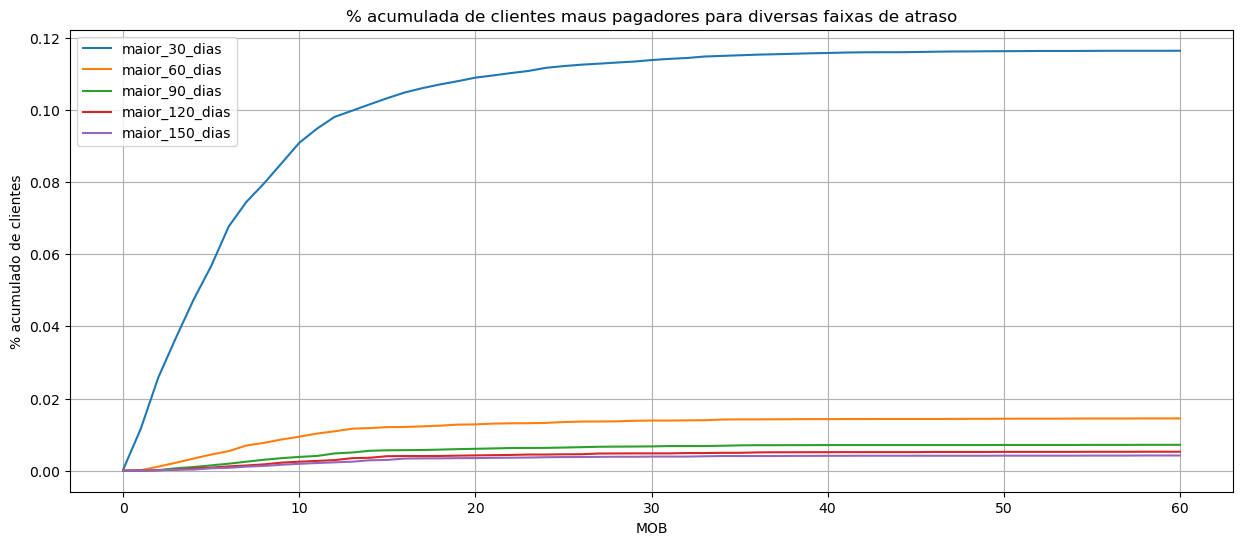

In [79]:
# Gerar grafico

df_taxa_mau.plot(grid=True, title='% acumulada de clientes maus pagadores para diversas faixas de atraso', figsize=(15,6))
plt.xlabel('MOB')
plt.ylabel('% acumulado de clientes')
plt.show()


In [80]:
# Data frame com janela maior que 12

df_clientes_aprovados_tratamento1 = df_clientes_aprovados.query('Janela >= 12').copy()


In [81]:

df_registros_creditos_id = pd.DataFrame(df_clientes_aprovados_tratamento1.groupby('ID_Cliente').apply(verifica, include_groups=False)).reset_index()
df_registros_creditos_id.columns = ['ID_Cliente', 'Mau']
df_registros_creditos_id.head()

,ID_Cliente,Mau
0,5001712,0
1,5001713,0
2,5001714,0
3,5001715,0
4,5001717,0


In [82]:
# Criar coluna target

# Tratativa necessarias
coluna = df_cadastrados_limpo['Rendimento_anual']

coluna_med = coluna.mean()
coluna_std = coluna.std()

limite_sup = coluna_med + (2 * coluna_std)
limite_inf = coluna_med - (2 * coluna_std)

index_outliers = []

for index, valor in coluna.items(): 
  if valor > limite_sup or valor < limite_inf:
    index_outliers.append(index)

# Criar data frame cadastrados_tratamento1
df_clientes_cadastrados_sem_outliers = df_cadastrados_limpo.drop(index_outliers)
df_clientes_cadastrados_tratamento1 = df_clientes_cadastrados_sem_outliers

# Criar data frame target
df_registro_clientes_targets = df_clientes_cadastrados_tratamento1.merge(df_registros_creditos_id, on='ID_Cliente')
df_registro_clientes_targets.head()

,ID_Cliente,Tem_carro,Tem_casa_propria,Tem_telefone_trabalho,Tem_telefone_fixo,Tem_email,Tamanho_familia,Rendimento_anual,Idade,Anos_empregado,Categoria_de_renda,Grau_escolaridade,Estado_civil,Moradia,Ocupacao,Mau
0,5008806,1,1,0,0,0,2.0,112500.0,58.793815,3.104787,Empregado,Ensino médio,Casado,Casa/apartamento próprio,Segurança,0
1,5008810,0,1,0,1,1,1.0,270000.0,52.321403,8.353354,Associado comercial,Ensino médio,Solteiro,Casa/apartamento próprio,Vendas,0
2,5008811,0,1,0,1,1,1.0,270000.0,52.321403,8.353354,Associado comercial,Ensino médio,Solteiro,Casa/apartamento próprio,Vendas,0
3,5008812,0,1,0,0,0,1.0,283500.0,61.504343,0.000000,Pensionista,Ensino superior,Divorciado,Casa/apartamento próprio,Outros,0
4,5008813,0,1,0,0,0,1.0,283500.0,61.504343,0.000000,Pensionista,Ensino superior,Divorciado,Casa/apartamento próprio,Outros,0


In [83]:
# Ver % de clientes bom e mau pagadores

df_registro_clientes_targets['Mau'].value_counts(normalize=True)*100

Mau
0    97.726673
1     2.273327
Name: proportion, dtype: float64

#### **Aula 3 - Machine Learning: Construindo a Pipeline**

Obs.: Class criadas no começo do código

In [84]:
# Separar a base entre treino e teste 

SEED = 1561651 

df_treino, df_teste = train_test_split(df_registro_clientes_targets, test_size=0.2, random_state=SEED)

In [85]:
# Ver shape do df_treino

df_treino.shape

(18193, 16)

In [86]:
# Ver shape do df_teste

df_teste.shape

(4549, 16)

In [87]:
# Salvar os dados de treino e teste

df_treino_copy = df_treino.copy()
df_teste_copy = df_teste.copy()

In [88]:
# Ver os dados de treino 

df_treino.head()

,ID_Cliente,Tem_carro,Tem_casa_propria,Tem_telefone_trabalho,Tem_telefone_fixo,Tem_email,Tamanho_familia,Rendimento_anual,Idade,Anos_empregado,Categoria_de_renda,Grau_escolaridade,Estado_civil,Moradia,Ocupacao,Mau
3806,5029272,1,1,1,1,0,2.0,116653.5,25.380398,4.547664,Associado comercial,Ensino médio,Casado,Casa/apartamento próprio,Construção Civil,0
17766,5116598,0,0,0,1,0,2.0,144000.0,61.994428,0.000000,Pensionista,Ensino médio,Casado,Casa/apartamento próprio,Outros,0
16516,5112969,0,0,1,1,0,2.0,112500.0,50.790913,14.100221,Empregado,Ensino médio,União-estável,Casa/apartamento próprio,Construção Civil,0
1286,5021463,1,0,0,0,0,3.0,225000.0,31.488668,2.012362,Empregado,Ensino superior,União-estável,Casa/apartamento próprio,Equipe principal,0
17868,5116780,1,1,1,0,0,2.0,211500.0,36.761877,14.338419,Associado comercial,Ensino médio,Casado,Casa/apartamento próprio,Outros,0


#### **Aula 4 - Machine Learning: Escolhendo o Melhor Modelo**

In [89]:
# Rodar o pipeline para o treino

treino = pipeline(df_treino)

In [90]:
# Ver os dados

treino.head()

,Categoria_de_renda_Associado comercial,Categoria_de_renda_Empregado,Categoria_de_renda_Estudante,Categoria_de_renda_Pensionista,Categoria_de_renda_Servidor público,Estado_civil_Casado,Estado_civil_Divorciado,Estado_civil_Solteiro,Estado_civil_União-estável,Estado_civil_Viúvo,...,Tem_casa_propria,Tem_telefone_trabalho,Tem_telefone_fixo,Tem_email,Tamanho_familia,Rendimento_anual,Idade,Anos_empregado,Grau_escolaridade,Mau
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1,1,1,0,0.071429,0.237179,0.086979,0.105709,1.0,0
1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0.071429,0.309524,0.855763,0.000000,1.0,0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,1,1,0,0.071429,0.226190,0.620523,0.327754,1.0,0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0.142857,0.523810,0.215234,0.046777,2.0,0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1,1,0,0,0.071429,0.488095,0.325956,0.333291,1.0,0


In [91]:
# Analisar a distribuição percentual da variavel target

treino['Mau'].value_counts(normalize=True)*100


Mau
0    50.0
1    50.0
Name: proportion, dtype: float64

In [92]:
# Separar x e y treino 

x_treino, y_treino = treino.loc[:, treino.columns != 'Mau'], treino['Mau']

In [93]:
# Rodar o pipeline para o teste

teste = pipeline(df_teste)

In [94]:
# Ver os dados

teste.head()

,Categoria_de_renda_Associado comercial,Categoria_de_renda_Empregado,Categoria_de_renda_Estudante,Categoria_de_renda_Pensionista,Categoria_de_renda_Servidor público,Estado_civil_Casado,Estado_civil_Divorciado,Estado_civil_Solteiro,Estado_civil_União-estável,Estado_civil_Viúvo,...,Tem_casa_propria,Tem_telefone_trabalho,Tem_telefone_fixo,Tem_email,Tamanho_familia,Rendimento_anual,Idade,Anos_empregado,Grau_escolaridade,Mau
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1,0,0,0,0.000000,0.178571,0.847034,0.000000,2.0,0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1,1,1,0,0.071429,0.523810,0.329230,0.338420,1.0,0
2,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1,1,0,0,0.214286,0.226190,0.372605,0.364600,0.0,0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1,0,0,0,0.000000,0.190476,0.800840,0.079114,1.0,0
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0.071429,0.226190,0.610251,0.044761,1.0,0


In [95]:
# Separar x e y teste

x_teste, y_teste = teste.loc[:, teste.columns != 'Mau'], teste['Mau']

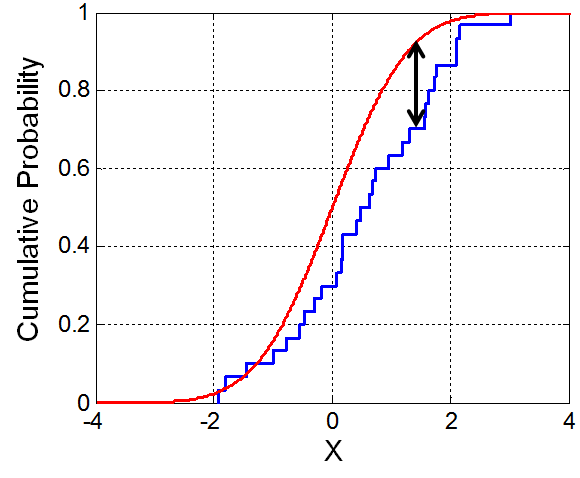


------------------------------Resultados LogisticRegression()------------------------------

AUC (Teste): 0.6562872729819933
Métrica KS:
  Statistic: 0.047832921625870196
  P-value: 2.8093586637858553e-09

Confusion Matrix (Teste)



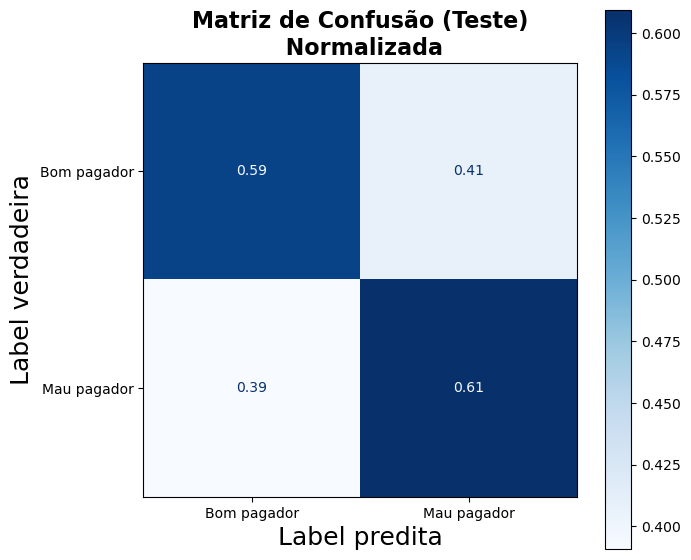


Classification Report (Teste)
              precision    recall  f1-score   support

           0       0.60      0.59      0.60      4453
           1       0.60      0.61      0.60      4453

    accuracy                           0.60      8906
   macro avg       0.60      0.60      0.60      8906
weighted avg       0.60      0.60      0.60      8906


ROC Curve (Teste)



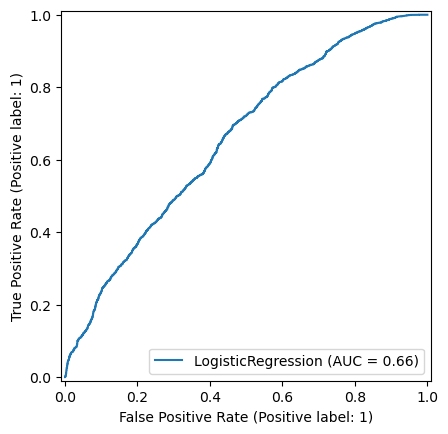

In [107]:
# Gerar resultado LogisticRegression

modelo_logistico = LogisticRegression()
roda_modelo(modelo_logistico, x_treino, y_treino, x_teste, y_teste)


------------------------------Resultados DecisionTreeClassifier()------------------------------

AUC (Teste): 0.862548324544867
Métrica KS:
  Statistic: 0.22501684257803728
  P-value: 6.126787575141143e-198

Confusion Matrix (Teste)



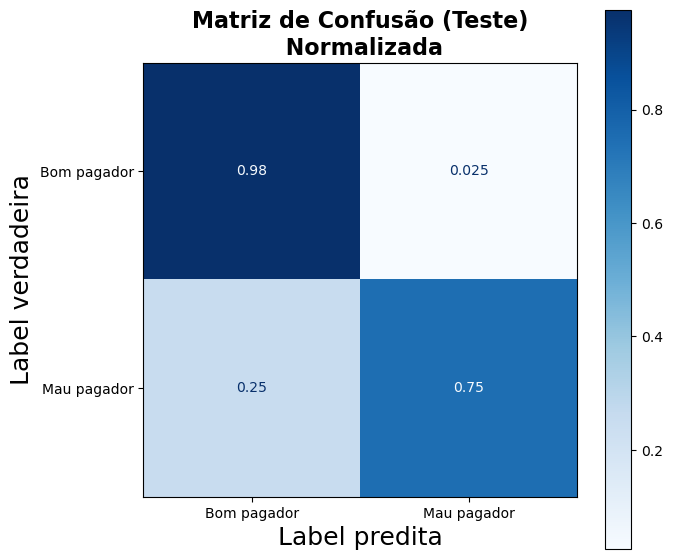


Classification Report (Teste)
              precision    recall  f1-score   support

           0       0.79      0.98      0.88      4453
           1       0.97      0.75      0.84      4453

    accuracy                           0.86      8906
   macro avg       0.88      0.86      0.86      8906
weighted avg       0.88      0.86      0.86      8906


ROC Curve (Teste)



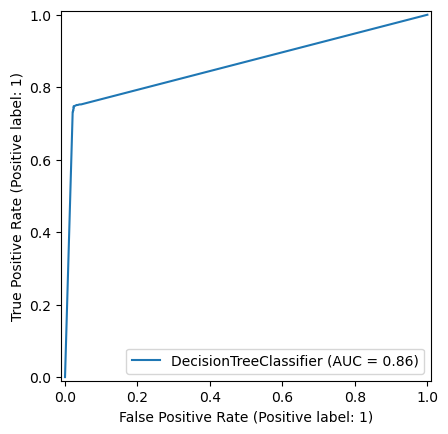

In [108]:
# Gerar resultado DecisionTreeClassifier

modelo_tree = DecisionTreeClassifier()
roda_modelo(modelo_tree, x_treino, y_treino, x_teste, y_teste)


------------------------------Resultados RandomForestClassifier()------------------------------

AUC (Teste): 0.9695072556852872
Métrica KS:
  Statistic: 0.3953514484617112
  P-value: 0.0

Confusion Matrix (Teste)



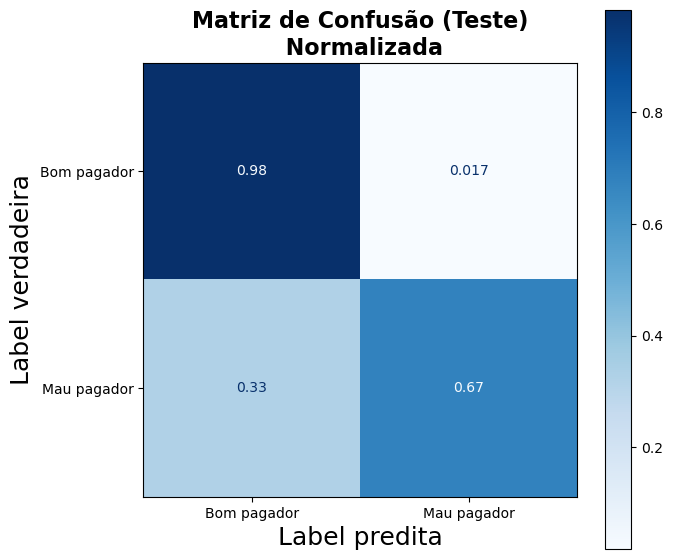


Classification Report (Teste)
              precision    recall  f1-score   support

           0       0.75      0.98      0.85      4453
           1       0.98      0.67      0.80      4453

    accuracy                           0.83      8906
   macro avg       0.86      0.83      0.82      8906
weighted avg       0.86      0.83      0.82      8906


ROC Curve (Teste)



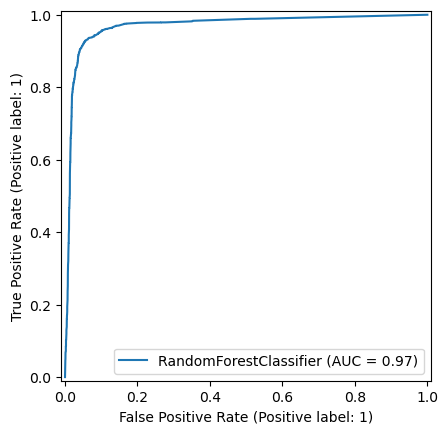

In [109]:
# Gerar resultado RandomForestClassifier

modelo_forest = RandomForestClassifier()
roda_modelo(modelo_forest, x_treino, y_treino, x_teste, y_teste)


------------------------------Resultados GradientBoostingClassifier()------------------------------

AUC (Teste): 0.9589845464839268
Métrica KS:
  Statistic: 0.1335055019088255
  P-value: 1.444154421819135e-69

Confusion Matrix (Teste)



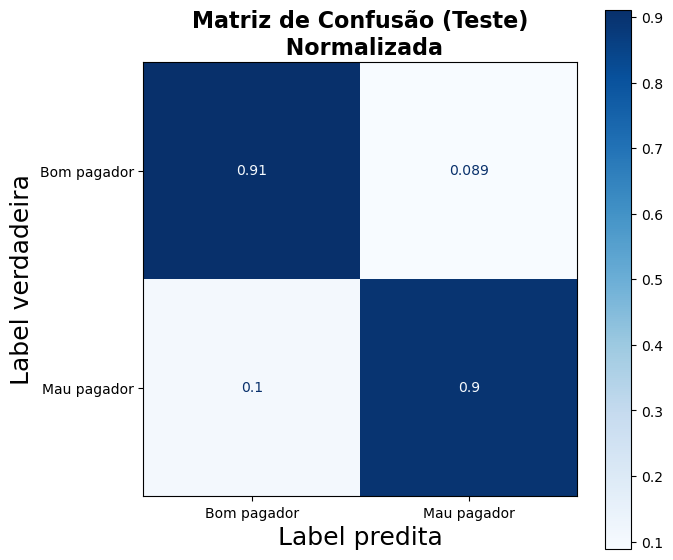


Classification Report (Teste)
              precision    recall  f1-score   support

           0       0.90      0.91      0.90      4453
           1       0.91      0.90      0.90      4453

    accuracy                           0.90      8906
   macro avg       0.90      0.90      0.90      8906
weighted avg       0.90      0.90      0.90      8906


ROC Curve (Teste)



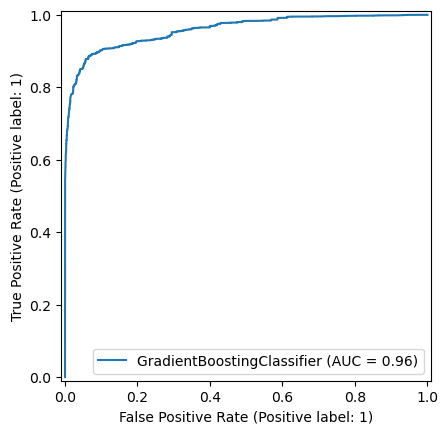

In [110]:
# Gerar resultado GradientBoostingClassifier

modelo_xgb = GradientBoostingClassifier()
roda_modelo(modelo_xgb, x_treino, y_treino, x_teste, y_teste)

#### **Aula 5 - Criando a aplicação**

In [ ]:
joblib.dump(modelo_xgb, 'xgb.joblib')